In [2]:
from models import load_model
from preprocessors.lion_preprocessors import ImageEvalProcessor

lion_model = load_model("lion_t5", "flant5xl", is_eval=True, device="cuda:0")
lion_preprocessor = ImageEvalProcessor()

/data/Users/sly/miniconda3/envs/nd_test/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading VIT
Using normal vit
ViT Depth: 39
Loading VIT Done
Loading LLM


Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]


Loading LLM Done
Loading QFormer
Loading QFormer Done
Loading Vision Aggregator
Loading Vision Aggregator Done
loading pretrain:  /data/Users/sly/old_home/LION/XL_stage3_Learnable.pth
unexpected_keys:  []


## Generate Image Caption on Image-Level Tasks

Loading RAM Model For Tag Generation
/encoder/layer/0/crossattention/self/query is tied
/encoder/layer/0/crossattention/self/key is tied
/encoder/layer/0/crossattention/self/value is tied
/encoder/layer/0/crossattention/output/dense is tied
/encoder/layer/0/crossattention/output/LayerNorm is tied
/encoder/layer/0/intermediate/dense is tied
/encoder/layer/0/output/dense is tied
/encoder/layer/0/output/LayerNorm is tied
/encoder/layer/1/crossattention/self/query is tied
/encoder/layer/1/crossattention/self/key is tied
/encoder/layer/1/crossattention/self/value is tied
/encoder/layer/1/crossattention/output/dense is tied
/encoder/layer/1/crossattention/output/LayerNorm is tied
/encoder/layer/1/intermediate/dense is tied
/encoder/layer/1/output/dense is tied
/encoder/layer/1/output/LayerNorm is tied
--------------
/data/Users/sly/private_models/recognize_anything_model/ram_swin_large_14m.pth
--------------
load checkpoint from /data/Users/sly/private_models/recognize_anything_model/ram_swi

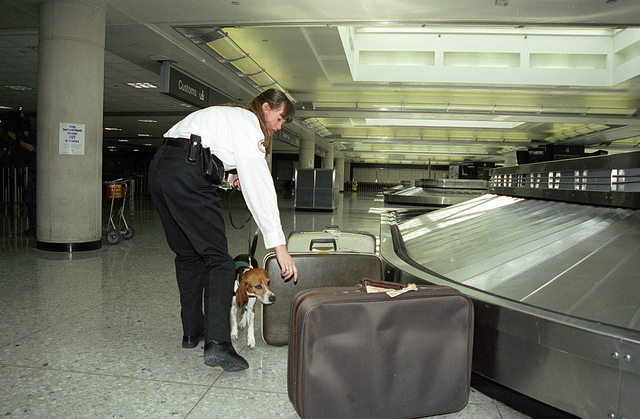

Question:  Please describe the image using a single short sentence.
Tags:  ['airport, beagle, bend, cart, check, pillar, transporter, dog, escalator, luggage, man, pet, push, stand, terminal']
Answer:  ['A woman standing next to a luggage carousel with a dog.']


In [3]:
from PIL import Image

# 1. Prepare Input Sample
img = Image.open("images/COCO_train2014_000000024935.jpg").convert("RGB")
question = "Please describe the image using a single short sentence."
tags = lion_model.generate_tags(img)
processed_img = lion_preprocessor(img)

# 2. Generate With Model
output = lion_model.generate({
    "image": processed_img.unsqueeze(0).cuda(),
    "question": [question],
    "tags": [tags],
    "category": "image_level",
})

display(img)
print("Question: ", question)
print("Tags: ", tags)
print("Answer: ", output)

## Referring Expression Comprehension (REC) on Region-Level Tasks

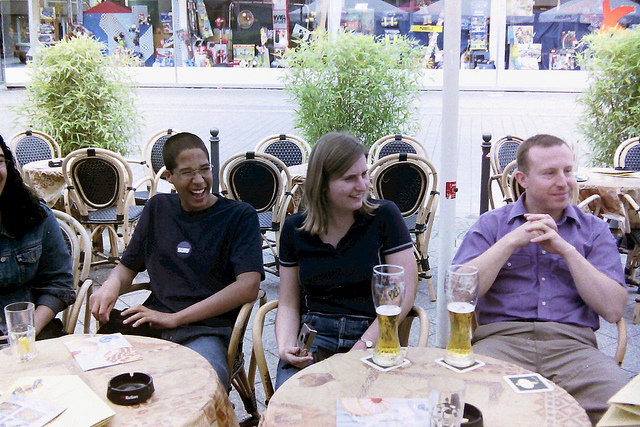

Question:  In the image <image>, can you locate green plant behind a table visible behind a lady ' s head and let me know its coordinates?
Tags: ['beer, beverage, cafe, conversation, table, drink, person, laugh, man, outdoor, round table, sit, smile, woman']
Answer:  ['Answer: [0.440,0.060,0.650,0.367]']


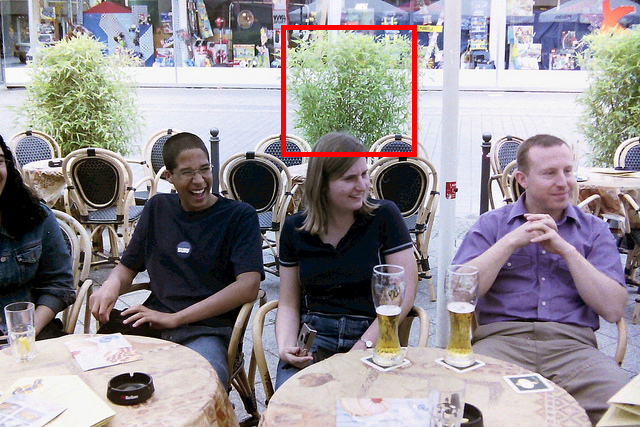

In [4]:
import re
from PIL import Image, ImageDraw

# 1. Prepare Input Sample
img = Image.open("images/COCO_train2014_000000533220.jpg").convert("RGB")
question = "In the image <image>, can you locate green plant behind a table visible behind a lady ' s head and let me know its coordinates?"
# tags = "beer, table, drink, restaurant, group, person, laugh, man, outdoor, sit, woman"
tags = lion_model.generate_tags(img)
processed_img = lion_preprocessor(img)

# 2. Generate With Model
output = lion_model.generate({
    "image": processed_img.unsqueeze(0).cuda(),
    "question": [question],
    "tags": [tags],
    "category": "region_level",
})
display(img)
print("Question: ", question)
print("Tags:", tags)
print("Answer: ", output)

# 3. Visualize Outputs
bbox = re.search(r'\[([0-9., ]+)\]', output[0]).group(1)
bbox = eval(bbox)

x1, y1, x2, y2 = [bbox[0]*img.width, bbox[1]*img.height, bbox[2]*img.width, bbox[3]*img.height]
draw = ImageDraw.Draw(img)
draw.rectangle([(x1,y1),(x2,y2)], outline=(255, 0, 0), width=5)

display(img)